In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/drugsComTrain_raw_sentiment.csv', encoding= 'unicode_escape')

In [ ]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-85t_qs_o
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-85t_qs_o
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=f8e5751bf2956735bff7fdbe3e5a4b0770e0fd7eb80cf7f1591623466725adb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-fw3jq89b/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
dataset['review'] = dataset['review'].apply(lambda x: get_clean(x))

In [ ]:
dataset['review']

0         it has no side effect i take it in combination...
1         my son is halfway through his fourth week of i...
2         i used to take another oral contraceptive whic...
3         this is my first time using any form of birth ...
4         suboxone has completely turned my life around ...
                                ...                        
161292    i wrote my first report in midoctober of 2014 ...
161293    i was given this in iv before surgey i immedia...
161294    limited improvement after 4 months developed b...
161295    ive been on thyroid medication 49 years i spen...
161296    ive had chronic constipation all my adult life...
Name: review, Length: 161297, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,5),stop_words='english' , analyzer='word')

In [ ]:
dataset['Sentiment'].value_counts()

Positive    97410
Negative    35063
Neutral     28824
Name: Sentiment, dtype: int64

In [ ]:
X = tfidf.fit_transform(dataset['review'])
Y = dataset['Sentiment']

In [ ]:
X

<161297x40000 sparse matrix of type '<class 'numpy.float64'>'
	with 19126223 stored elements in Compressed Sparse Row format>

In [ ]:
Y

0         Positive
1         Positive
2          Neutral
3         Positive
4         Positive
            ...   
161292    Positive
161293    Negative
161294    Negative
161295    Positive
161296    Positive
Name: Sentiment, Length: 161297, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
Y_test.value_counts()

Positive    19400
Negative     6991
Neutral      5869
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
nnc.fit(X_train, Y_train)
nnc_predictions =nnc.predict(X_test)
nnc_acc=accuracy_score(Y_test, nnc_predictions)
print(nnc_acc)

0.8387786732796032


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, nnc_predictions))

              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81      6991
     Neutral       0.66      0.66      0.66      5869
    Positive       0.90      0.91      0.90     19400

    accuracy                           0.84     32260
   macro avg       0.79      0.79      0.79     32260
weighted avg       0.84      0.84      0.84     32260



Text(0.5, 145.31999999999996, 'Predicted')

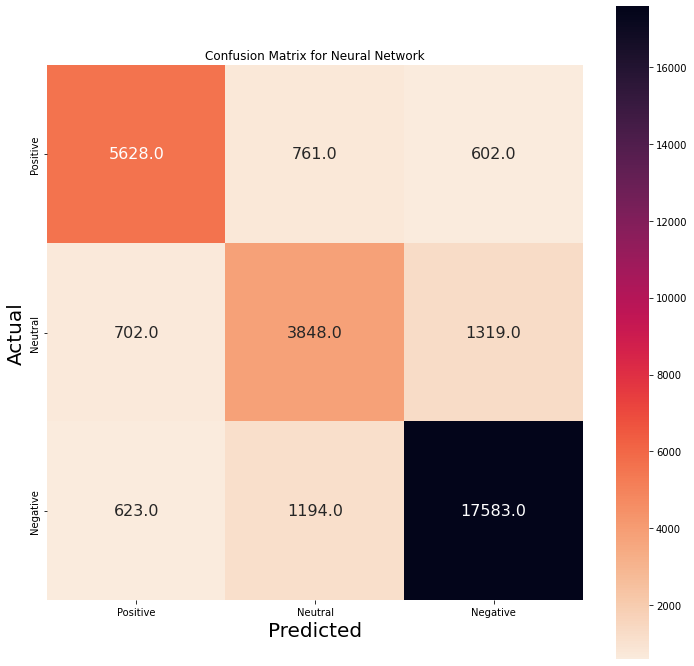

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = nnc_predictions
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)